In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

from survivors import metrics as metr
from survivors import constants as cnt
from survivors import criteria as crit
import survivors.datasets as ds

import warnings
warnings.filterwarnings("ignore")

In [3]:
X, y, feat, categ, _ = ds.load_backblaze_2016_2018(threshold=0.99)

In [4]:
X

,capacity_bytes,model,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_183_normalized,smart_183_raw,...,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw
0,4.000787e+12,0,100.0,0.0,NaN,NaN,100.0,3.0,97.0,3.0,...,100.0,3.0,100.0,0.0,87.0,568211539.0,NaN,NaN,84.0,14334.0
1,3.000593e+12,1,100.0,0.0,NaN,NaN,100.0,18.0,NaN,NaN,...,100.0,18.0,100.0,0.0,100.0,0.0,121.0,34.0,98.0,16274.0
2,3.000593e+12,1,100.0,0.0,NaN,NaN,100.0,9.0,NaN,NaN,...,100.0,9.0,100.0,0.0,100.0,0.0,124.0,33.0,97.0,23525.0
3,3.000593e+12,1,100.0,0.0,NaN,NaN,100.0,21.0,NaN,NaN,...,100.0,22.0,100.0,0.0,100.0,0.0,124.0,33.0,97.0,22891.0
4,3.000593e+12,1,100.0,0.0,NaN,NaN,100.0,14.0,NaN,NaN,...,100.0,14.0,100.0,0.0,100.0,0.0,124.0,33.0,99.0,10135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37620,1.200014e+13,88,100.0,0.0,NaN,NaN,100.0,1.0,NaN,NaN,...,100.0,1.0,100.0,0.0,100.0,921165.0,NaN,NaN,100.0,7.0
37621,1.200014e+13,88,100.0,0.0,NaN,NaN,100.0,1.0,NaN,NaN,...,100.0,1.0,100.0,0.0,100.0,464.0,NaN,NaN,100.0,0.0
37622,1.200014e+13,88,100.0,0.0,NaN,NaN,100.0,3.0,NaN,NaN,...,100.0,3.0,100.0,0.0,63.0,1821216.0,NaN,NaN,100.0,313.0
37623,1.200014e+13,88,100.0,0.0,NaN,NaN,100.0,2.0,NaN,NaN,...,100.0,2.0,100.0,0.0,63.0,1978855.0,NaN,NaN,100.0,81.0


<Axes: xlabel='time', ylabel='Density'>

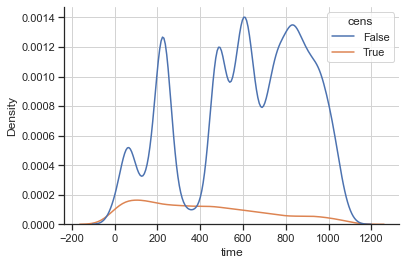

In [5]:
sns.kdeplot(pd.DataFrame(y), x="time", hue="cens")

In [16]:
X, y, feat, categ, _ = ds.load_alibaba_dataset(threshold=1)

In [17]:
X

,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,...,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw
0,100.0,0.0,100.0,15.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,86.0,0.0,100.0,15.0,100.0,0.0,64.0,2703879.0,100.0,25.0
1,100.0,0.0,100.0,29.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,88.0,0.0,100.0,29.0,100.0,0.0,73.0,18196221.0,100.0,83.0
2,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,20.0,100.0,0.0,69.0,7205841.0,100.0,29.0
3,100.0,0.0,100.0,30.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,85.0,0.0,100.0,30.0,100.0,0.0,72.0,16669075.0,100.0,77.0
4,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,86.0,0.0,100.0,21.0,100.0,0.0,70.0,10500760.0,100.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,100.0,0.0,100.0,8.0,100.0,0.0,100.0,0.0,100.0,4.295033e+09,...,93.0,0.0,100.0,8.0,93.0,1304.0,81.0,139435883.0,81.0,16869.0
33953,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,21.0,100.0,0.0,70.0,10438056.0,100.0,107.0
33954,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,20.0,100.0,0.0,72.0,16909229.0,100.0,232.0
33955,100.0,0.0,100.0,16.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,88.0,0.0,100.0,16.0,100.0,0.0,70.0,11195897.0,100.0,708.0


### Start gloabal collecting

In [13]:
df = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201707.csv")

In [16]:
df["dt"] = pd.to_datetime(df["dt"], format='%Y%m%d')

In [18]:
df.loc[df.groupby("serial_number")['dt'].idxmin()]

,Unnamed: 0,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_2_normalized,smart_2raw,smart_3_normalized,smart_3raw,...,smart_251raw,smart_252_normalized,smart_252raw,smart_253_normalized,smart_253raw,smart_254_normalized,smart_254raw,smart_255_normalized,smart_255raw,dt
439231,117229,disk_0,A,1,75.0,36922350.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
1061003,95000,disk_10,A,1,78.0,83633685.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
1061004,95001,disk_1000,A,1,66.0,4737867.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-12
392461,70459,disk_10000,A,1,78.0,73489666.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
91964,91964,disk_100007,A,1,80.0,117317462.0,NaN,NaN,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530269,47266,disk_99989,A,1,82.0,169365418.0,NaN,NaN,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
1084536,118533,disk_9999,A,1,74.0,29302258.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
26747,26747,disk_99991,A,1,74.0,25563473.0,NaN,NaN,93.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
891170,86165,disk_99994,A,1,81.0,119401139.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09


In [2]:
import os

main_dir = r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020"
for postfix in ["2017", "2018_Q1", "2018_Q2", "2018_Q3", "2018_Q4"]:
    l_df = []
    dir_global = os.path.join(main_dir, f"smartlog_data_{postfix}")
    for filename in os.listdir(dir_global):
        full_filename = os.path.join(dir_global, filename)
        print(full_filename)
        df = pd.read_csv(full_filename)
        df["dt"] = pd.to_datetime(df["dt"], format='%Y%m%d')
        l_df.append(df.loc[df.groupby("serial_number")['dt'].idxmin()])
        l_df.append(df.loc[df.groupby("serial_number")['dt'].idxmax()])
        del df
    print("End of loading!")
    df = pd.concat(l_df).reset_index(drop=True)
    df = pd.concat([df.loc[df.groupby("serial_number")['dt'].idxmin()],
                    df.loc[df.groupby("serial_number")['dt'].idxmax()]]).reset_index(drop=True)
    df.to_csv(os.path.join(main_dir, "Prepared", f"Alibaba_{postfix}.csv.gz"), index=False, compression='gzip')

D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201707.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201708.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201709.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201710.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201711.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201712.csv
End of loading!
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q1\smartlog_data_201801.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q1\smartlog_data_201802.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q1\smartlog_data_201803.csv
End of loading!
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q2\smartlog_data_201804.csv
D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2018_Q2\smartlog_data_201805.csv
D:\Surv

In [ ]:
collect_dir = r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Prepared"

l_df = []
for filename in os.listdir(collect_dir):
    full_filename = os.path.join(collect_dir, filename)
    print(full_filename)
    df = pd.read_csv(full_filename, compression='gzip')
    l_df.append(df)
df = pd.concat(l_df).reset_index()

In [6]:
df["dt"] = pd.to_datetime(df["dt"], format='%Y-%m-%d')
df = pd.concat([df.loc[df.groupby("serial_number")['dt'].idxmin()],
                df.loc[df.groupby("serial_number")['dt'].idxmax()]]).reset_index()
df.to_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Global_Alibaba.csv.gz", index=False, compression='gzip')

### Final collecting

In [64]:
df = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Global_Alibaba.csv.gz", compression='gzip')

In [66]:
df["dt"] = pd.to_datetime(df["dt"], format='%Y-%m-%d')
df["max_dt"] = df.groupby("serial_number")["dt"].transform("max")
df["time"] = (df["max_dt"] - df["dt"]).dt.days
df = df[df["time"] > 0]
# df = df[df["time"] < 500]

<Axes: xlabel='time', ylabel='Density'>

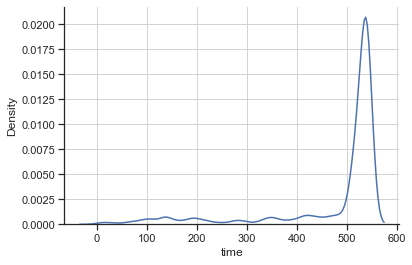

In [67]:
sns.kdeplot(df["time"])

In [85]:
df_target = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\fault_tag_data.csv")
df_target["fault_time"] = pd.to_datetime(df_target["fault_time"], format='%Y-%m-%d')
df_target = df_target.loc[df_target.groupby("serial_number")['fault_time'].idxmax()]

In [107]:
df_ = df.merge(df_target[["serial_number", "fault_time"]], how="left", on="serial_number")
df_["event"] = df_["fault_time"].notna()

In [108]:
df_["event"].sum()

2382

In [109]:
df_["final_dt"] = df_[["max_dt", "fault_time"]].apply(lambda x: x["max_dt"] if pd.isna(x["fault_time"]) else x["fault_time"], axis=1)
df_["event_time"] = (df_["final_dt"] - df_["dt"]).dt.days
df_ = df_[df_["event_time"] > 0]
df_ = df_[df_["event_time"] < 510]

In [110]:
df_.to_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Final_Alibaba.csv.gz", index=False, compression='gzip')

In [118]:
df_ = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Final_Alibaba.csv.gz", compression='gzip')
df_.columns = [f"{c[:-3]}_raw" if c.endswith("raw") else c for c in df_.columns]
df_cut = df_.iloc[:, 3:-7]
df_cut["event"] = df_["event"]
df_cut["event_time"] = df_["event_time"]

In [138]:
df_cut.to_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Cut_Alibaba.csv.gz", index=False, compression='gzip')

In [142]:
df_cut

,serial_number,manufacturer,model,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_252_normalized,smart_252_raw,smart_253_normalized,smart_253_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,event,event_time
0,disk_1,A,2,73.0,18855387.0,NaN,NaN,86.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,471
1,disk_100001,A,2,100.0,11308.0,NaN,NaN,88.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,202
2,disk_100003,A,2,74.0,26743349.0,NaN,NaN,89.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,202
3,disk_100005,A,2,100.0,628797.0,NaN,NaN,85.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,184
4,disk_100006,A,2,100.0,10613.0,NaN,NaN,86.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,disk_99991,A,1,74.0,25563473.0,NaN,NaN,93.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,256
33953,disk_99993,A,2,100.0,11421.0,NaN,NaN,89.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,184
33954,disk_99995,A,2,100.0,12045.0,NaN,NaN,89.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,192
33955,disk_99997,A,2,81.0,128753202.0,NaN,NaN,88.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,149


## Experiments

<Axes: xlabel='time', ylabel='Density'>

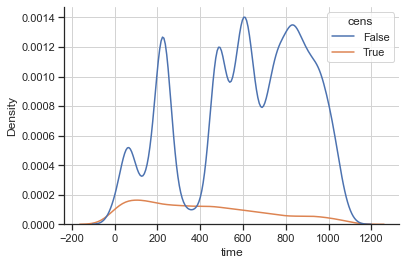

In [2]:
X_b, y_b, feat_b, categ_b, _ = ds.load_backblaze_2016_2018(threshold=0.99)
sns.kdeplot(pd.DataFrame(y_b), x="time", hue="cens")

<Axes: xlabel='time', ylabel='Density'>

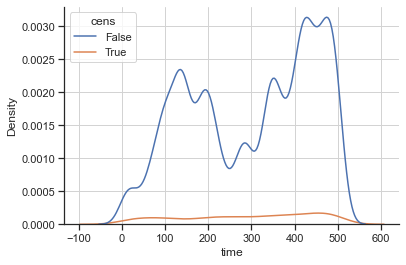

In [3]:
X_a, y_a, feat_a, categ_a, _ = ds.load_alibaba_dataset(threshold=1)
sns.kdeplot(pd.DataFrame(y_a), x="time", hue="cens")

In [116]:
from survivors.experiments.grid import generate_sample, prepare_sample, count_metric
from sklearn.model_selection import train_test_split

X_a_TR, X_a_HO = train_test_split(X_a, stratify=y_a["cens"], test_size=0.33, random_state=42)
X_a_ftr, y_a_ftr, X_a_HO, y_a_HO, bins_a_HO = prepare_sample(X_a, y_a, X_a_TR.index, X_a_HO.index)
X_a_tr, X_a_val, y_a_tr, y_a_val = train_test_split(X_a_ftr, y_a_ftr, stratify=y_a_ftr["cens"], test_size=0.2, random_state=42)

X_b_TR, X_b_HO = train_test_split(X_b, stratify=y_b["cens"], test_size=0.33, random_state=42)
X_b_ftr, y_b_ftr, X_b_HO, y_b_HO, bins_b_HO = prepare_sample(X_b, y_b, X_b_TR.index, X_b_HO.index)
X_b_tr, X_b_val, y_b_tr, y_b_val = train_test_split(X_b_ftr, y_b_ftr, stratify=y_b_ftr["cens"], test_size=0.2, random_state=42)

In [117]:
from survivors.tree import CRAID
from sklearn.model_selection import ParameterGrid

grid = {"leaf_model": ["base", "base_zero_after"],
        "criterion": ["logrank", "peto"],
        "depth": [5, 8, 12],
        "min_samples_leaf": [0.01, 0.005, 0.0005, 0.0001],
        "cut": [False],
}

def search_hyperparams(n_model, grid, X_tr, y_tr, 
                       X_val, y_val, bins_val, verbose=False):
    grid_params = ParameterGrid(grid)
    l_p = []
    for p in grid_params:
        tree = n_model(**p)
        tree.fit(X_tr, y_tr)
        sf = tree.predict_at_times(X_val, bins_val, mode="surv")
        ibs_tr = metr.ibs_remain(y_val, y_val, sf, bins_val)
        if verbose:
            print(p, ibs_tr)
        l_p.append((p, ibs_tr))
    l_p = sorted(l_p, key=lambda x: x[1])
    best_param = l_p[0][0]
    return best_param

def apply_model(model, X_tr, y_tr, l_HO):
    model.fit(X_tr, y_tr)
    for l in l_HO:
        X_HO, y_HO, bins_HO = l
        sf = model.predict_at_times(X_HO, bins_HO, mode="surv")
        hf = model.predict_at_times(X_HO, bins_HO, mode="hazard")
        print(f"IBS: {metr.ibs_remain(y_HO, y_HO, sf, bins_HO):.5f}")
        print(f"AUPRC: {metr.auprc(y_HO, y_HO, sf, bins_HO):.5f}")
        print(f"IAUC: {metr.iauc(y_HO, y_HO, hf, bins_HO):.5f}")
        print()

In [105]:
from survivors.tree import CRAID

best_param = {'criterion': 'logrank', 'cut': False, 'depth': 10, 'leaf_model': 'base', 
     'min_samples_leaf': 0.001, 'woe': True}

best_param = search_hyperparams(CRAID, grid, X_b_tr, y_b_tr, 
                                X_a_val, y_a_val, bins_a_HO)

print(f"Best param: {best_param}")
    
apply_model(CRAID(**best_param), X_b_tr, y_b_tr,
            [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])
# tree = CRAID(**best_param)
# tree.fit(X_b_tr, y_b_tr)
# sf_a = tree.predict_at_times(X_a_HO, bins_a_HO, mode="surv")
# sf_b = tree.predict_at_times(X_b_HO, bins_b_HO, mode="surv")

# print("IBS A:", metr.ibs_remain(y_a_HO, y_a_HO, sf_a, bins_a_HO))
# print("IBS B:", metr.ibs_remain(y_b_HO, y_b_HO, sf_b, bins_b_HO))

# print("AUPRC A:", metr.auprc(y_a_HO, y_a_HO, sf_a, bins_a_HO))
# print("AUPRC B:", metr.auprc(y_b_HO, y_b_HO, sf_b, bins_b_HO))

Best param: {'criterion': 'logrank', 'cut': False, 'depth': 12, 'leaf_model': 'base_zero_after', 'min_samples_leaf': 0.01}
IBS: 0.09415
AUPRC: 0.89866
IAUC: 0.36394
IBS: 0.07949
AUPRC: 0.91840
IAUC: 0.80826


In [111]:
p = {'criterion': 'peto', 'cut': False, 'depth': 5, 'leaf_model': 'base', 
     'min_samples_leaf': 0.0001, 'woe': True}

apply_model(CRAID(**p), X_a_tr, y_a_tr,
            [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])

IBS: 0.05638
AUPRC: 0.94476
IAUC: 0.61416
IBS: 0.20065
AUPRC: 0.83436
IAUC: 0.34564


In [35]:
from survivors.tree import CRAID

p = {'criterion': 'peto', 'cut': False, 'depth': 5, 'leaf_model': 'base', 
     'min_samples_leaf': 0.0001, 'woe': True}
tree = CRAID(**p)
tree.fit(X_a_tr, y_a_tr)
sf_a = tree.predict_at_times(X_a_HO, bins_a_HO, mode="surv")
sf_b = tree.predict_at_times(X_b_HO, bins_b_HO, mode="surv")

print("IBS A:", metr.ibs_remain(y_a_HO, y_a_HO, sf_a, bins_a_HO))
print("IBS B:", metr.ibs_remain(y_b_HO, y_b_HO, sf_b, bins_b_HO))

print("AUPRC A:", metr.auprc(y_a_HO, y_a_HO, sf_a, bins_a_HO))
print("AUPRC B:", metr.auprc(y_b_HO, y_b_HO, sf_b, bins_b_HO))

IBS A: 0.05556669761351436
IBS B: 0.19620521806214386
AUPRC A: 0.9458237768164103
AUPRC B: 0.8326474377039498


In [112]:
p = {'criterion': 'peto', 'cut': False, 'depth': 12, 
     'min_samples_leaf': 0.005, 'woe': True}

apply_model(CRAID(**p), pd.concat([X_a_tr, X_b_tr]), np.concatenate([y_a_tr, y_b_tr]),
            [(X_a_HO, y_a_HO, bins_a_HO), (X_b_HO, y_b_HO, bins_b_HO)])

IBS: 0.05791
AUPRC: 0.94703
IAUC: 0.62902
IBS: 0.08139
AUPRC: 0.91723
IAUC: 0.80303


In [12]:
np.bincount(y_b_HO["cens"]) / y_b_HO["cens"].shape

array([0.88749295, 0.11250705])

In [34]:
a = pd.DataFrame([], columns=X_b.columns)

In [36]:
a[X_a.columns] = X_a

In [37]:
a

,capacity_bytes,model,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_183_normalized,smart_183_raw,...,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw
0,NaN,NaN,100.0,0.0,NaN,NaN,100.0,15.0,NaN,NaN,...,100.0,15.0,100.0,0.0,64.0,2703879.0,NaN,NaN,100.0,25.0
1,NaN,NaN,100.0,0.0,NaN,NaN,100.0,29.0,NaN,NaN,...,100.0,29.0,100.0,0.0,73.0,18196221.0,NaN,NaN,100.0,83.0
2,NaN,NaN,100.0,0.0,NaN,NaN,100.0,20.0,NaN,NaN,...,100.0,20.0,100.0,0.0,69.0,7205841.0,NaN,NaN,100.0,29.0
3,NaN,NaN,100.0,0.0,NaN,NaN,100.0,30.0,NaN,NaN,...,100.0,30.0,100.0,0.0,72.0,16669075.0,NaN,NaN,100.0,77.0
4,NaN,NaN,100.0,0.0,NaN,NaN,100.0,21.0,NaN,NaN,...,100.0,21.0,100.0,0.0,70.0,10500760.0,NaN,NaN,100.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,NaN,NaN,100.0,0.0,NaN,NaN,100.0,8.0,NaN,NaN,...,100.0,8.0,93.0,1304.0,81.0,139435883.0,NaN,NaN,81.0,16869.0
33953,NaN,NaN,100.0,0.0,NaN,NaN,100.0,21.0,NaN,NaN,...,100.0,21.0,100.0,0.0,70.0,10438056.0,NaN,NaN,100.0,107.0
33954,NaN,NaN,100.0,0.0,NaN,NaN,100.0,20.0,NaN,NaN,...,100.0,20.0,100.0,0.0,72.0,16909229.0,NaN,NaN,100.0,232.0
33955,NaN,NaN,100.0,0.0,NaN,NaN,100.0,16.0,NaN,NaN,...,100.0,16.0,100.0,0.0,70.0,11195897.0,NaN,NaN,100.0,708.0


In [45]:
X_b.values[:, :X_a.shape[1]].shape

(37625, 48)

In [49]:
pd.DataFrame(X_a.values, columns=X_b.columns[:X_a.shape[1]])

,capacity_bytes,model,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_183_normalized,smart_183_raw,...,smart_1_normalized,smart_1_raw,smart_200_normalized,smart_200_raw,smart_223_normalized,smart_223_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw
0,100.0,0.0,100.0,15.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,86.0,0.0,100.0,15.0,100.0,0.0,64.0,2703879.0,100.0,25.0
1,100.0,0.0,100.0,29.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,88.0,0.0,100.0,29.0,100.0,0.0,73.0,18196221.0,100.0,83.0
2,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,20.0,100.0,0.0,69.0,7205841.0,100.0,29.0
3,100.0,0.0,100.0,30.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,85.0,0.0,100.0,30.0,100.0,0.0,72.0,16669075.0,100.0,77.0
4,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,86.0,0.0,100.0,21.0,100.0,0.0,70.0,10500760.0,100.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33952,100.0,0.0,100.0,8.0,100.0,0.0,100.0,0.0,100.0,4.295033e+09,...,93.0,0.0,100.0,8.0,93.0,1304.0,81.0,139435883.0,81.0,16869.0
33953,100.0,0.0,100.0,21.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,21.0,100.0,0.0,70.0,10438056.0,100.0,107.0
33954,100.0,0.0,100.0,20.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,89.0,0.0,100.0,20.0,100.0,0.0,72.0,16909229.0,100.0,232.0
33955,100.0,0.0,100.0,16.0,100.0,0.0,100.0,0.0,100.0,0.000000e+00,...,88.0,0.0,100.0,16.0,100.0,0.0,70.0,11195897.0,100.0,708.0
